<a href="https://colab.research.google.com/github/JHU-Kessler-Group/GraftedHybridLatexPaper/blob/main/Figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Experimental Data from Github Repo

In [1]:
!rm -rf GraftedHybridLatexPaper
!git clone https://github.com/JHU-Kessler-Group/GraftedHybridLatexPaper.git

Cloning into 'GraftedHybridLatexPaper'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 84 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 15.80 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### Import Libraries, read in data file, and plot original data

---




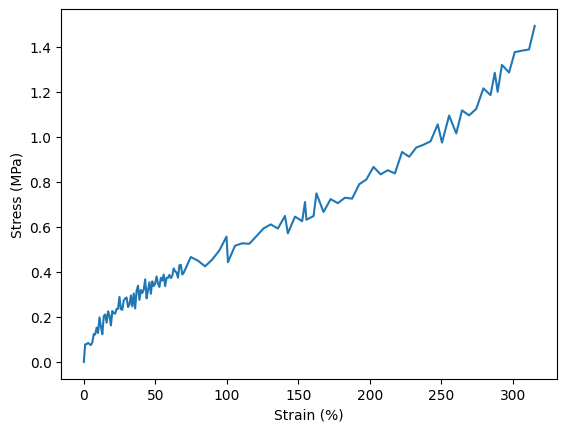

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')
# display(pu_0_0_df.head())

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df)
plt.show()

### Smooth data using LOWESS (Locally Weighted Regression), plot smoothed and original data, plot just smoothed data
Adjust *frac* value in the LOWESS funcion to change smoothing by adjusting the *smooth_level* variable below.  A higher value results in more smoothing.  Typical values for *frac* are from 0.02 to 0.1. Increase slightly if you still see noise.

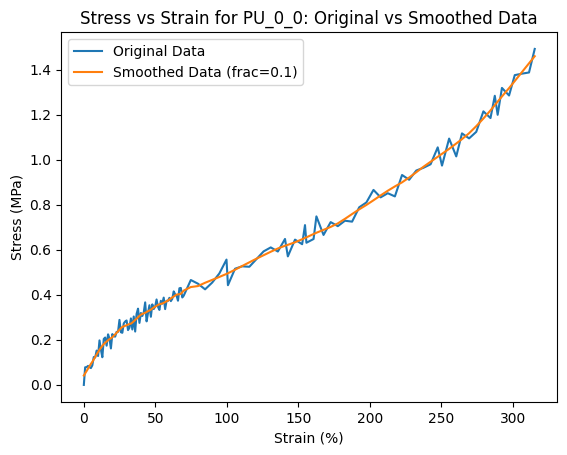

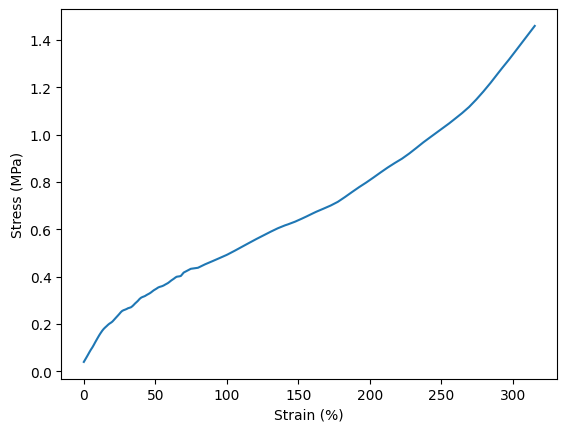

In [26]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smooth_level=0.1 # <-- Adjust this value to change smoothing, 0.02–0.1 typical

smoothed = lowess(pu_0_0_df['Stress (MPa)'],
                  pu_0_0_df['Strain (%)'],
                  frac=smooth_level)

smoothed_data = pd.DataFrame({
    'Strain (%)': smoothed[:, 0],
    'Stress (MPa)': smoothed[:, 1]
})

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')

#Plot the smoothed data
sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed_data,
             label=f'Smoothed Data (frac={smooth_level})')

plt.title('Stress vs Strain for PU_0_0: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.show()
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data)
plt.show()

### Read in PU_0.1, PU_0.2, and PU_0.3 CSV files, and smooth the data